In [140]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df = pd.read_csv('by_hour_day.csv', names=['day','count','cam'])
df = df[df['day'] != 'Error']
df['date'] = pd.to_datetime(df['day'] + str(':00:00'), format='%Y-%m-%d %H:%M:%S')
df.set_index(df['date'], inplace = True)
df['dow'] = df.index.dayofweek
df['hour'] = df.index.hour
df['date'] = df.index.date
df.head(3)

,day,count,cam,date,dow,hour
date,,,,,,
2017-06-27 20:00:00,2017-06-27 20,19,121,2017-06-27,1,20
2017-06-27 20:00:00,2017-06-27 20,48,125,2017-06-27,1,20
2017-06-27 20:00:00,2017-06-27 20,9,126,2017-06-27,1,20


In [133]:
dif = pd.DataFrame(df.groupby(['dow','date'])['count'].mean())
idx = pd.IndexSlice

In [135]:
dif.loc[idx[[1],:]]['count'][1][0]

45.684981684981686

In [136]:
dic = {}
dic.update({'0': dif.loc[idx[[0],:]]['count'][0][1] - dif.loc[idx[[0],:]]['count'][0][0]})
dic.update({'1': dif.loc[idx[[1],:]]['count'][1][1] - dif.loc[idx[[1],:]]['count'][1][0]})
for i in range(2,7):
    dic.update({i: dif.loc[idx[[i],:]]['count'][1] - dif.loc[idx[[i],:]]['count'][0]})

In [137]:
dic

{2: 2.3374542124542188,
 3: 7.5218829172255255,
 4: -15.26920383538031,
 5: 6.4574697667528511,
 6: 0.9472102142138894,
 '0': 8.9247917115564164,
 '1': 14.715964590964589}

## For Lower Manhattan only

In [6]:
df = pd.read_csv('output_lower_mn.csv', names=['day','count','cam'])
df = df[df['day'] != 'Error']
df['date'] = pd.to_datetime(df['day'] + str(':00:00'), format='%Y-%m-%d %H:%M:%S')
df.set_index(df['date'], inplace = True)
df['dow'] = df.index.dayofweek
df['hour'] = df.index.hour
df['date'] = df.index.date
df.head(3)

,day,count,cam,date,dow,hour
date,,,,,,
2017-06-27 20:00:00,2017-06-27 20,153,163,2017-06-27,1,20
2017-06-27 20:00:00,2017-06-27 20,59,165,2017-06-27,1,20
2017-06-27 20:00:00,2017-06-27 20,17,166,2017-06-27,1,20


In [220]:
df_mean = pd.DataFrame(df.groupby([df.hour,df.date,df.dow > 4]).mean()['count'])
df_mean['hour'] = df_mean.index.get_level_values(0)
df_mean['date'] = df_mean.index.get_level_values(1)
df_mean['wk'] = df_mean.index.get_level_values(2)
df_mean

count  hour        date     wk
hour date       dow                                      
0    2017-06-28 False  36.093458     0  2017-06-28  False
     2017-06-29 False  34.233645     0  2017-06-29  False
     2017-06-30 False  36.205607     0  2017-06-30  False
     2017-07-01 True   47.514019     0  2017-07-01   True
     2017-07-02 True   47.485981     0  2017-07-02   True
     2017-07-03 False  37.233645     0  2017-07-03  False
     2017-07-04 False  40.112150     0  2017-07-04  False
     2017-07-05 False  41.943925     0  2017-07-05  False
     2017-07-06 False  27.523364     0  2017-07-06  False
     2017-07-07 False  35.632075     0  2017-07-07  False
     2017-07-08 True   44.622642     0  2017-07-08   True
     2017-07-09 True   50.264151     0  2017-07-09   True
     2017-07-10 False  35.150943     0  2017-07-10  False
     2017-07-11 False  32.962264     0  2017-07-11  False
     2017-07-12 False  32.887850     0  2017-07-12  False
     2017-07-13 False  35.345794     0  2017-07-13  False
1    2017-06-28 False  22.990654     1  2017-06-28  False
     2017-06-29 False  16.570093     1  2017-06-29  False
     2017-06-30 False  26.616822     1  2017-06-30  False
     2017-07-01 True   33.841121     1  2017-07-01   True
     2017-07-02 True   34.102804     1  2017-07-02   True
     2017-07-03 False  26.859813     1  2017-07-03  False
     2017-07-04 False  29.186916     1  2017-07-04  False
     2017-07-05 False  27.523364     1  2017-07-05  False
     2017-07-06 False  24.523364     1  2017-07-06  False
     2017-07-07 False  24.396226     1  2017-07-07  False
     2017-07-08 True   34.660377     1  2017-07-08   True
     2017-07-09 True   37.669811     1  2017-07-09   True
     2017-07-10 False  23.716981     1  2017-07-10  False
     2017-07-11 False  23.820755     1  2017-07-11  False
...                          ...   ...         ...    ...
22   2017-06-29 False  66.859813    22  2017-06-29  False
     2017-06-30 False  75.224299    22  2017-06-30  False
     2017-07-01 True   61.700935    22  2017-07-01   True
     2017-07-02 True   58.420561    22  2017-07-02   True
     2017-07-03 False  60.841121    22  2017-07-03  False
     2017-07-04 False  87.261682    22  2017-07-04  False
     2017-07-05 False  62.411215    22  2017-07-05  False
     2017-07-06 False  62.660377    22  2017-07-06  False
     2017-07-07 False  51.537736    22  2017-07-07  False
     2017-07-08 True   67.264151    22  2017-07-08   True
     2017-07-09 True   54.471698    22  2017-07-09   True
     2017-07-10 False  58.377358    22  2017-07-10  False
     2017-07-11 False  58.813084    22  2017-07-11  False
     2017-07-12 False  61.616822    22  2017-07-12  False
23   2017-06-27 False  50.532710    23  2017-06-27  False
     2017-06-28 False  46.757009    23  2017-06-28  False
     2017-06-29 False  49.710280    23  2017-06-29  False
     2017-06-30 False  53.560748    23  2017-06-30  False
     2017-07-01 True   56.392523    23  2017-07-01   True
     2017-07-02 True   46.364486    23  2017-07-02   True
     2017-07-03 False  51.635514    23  2017-07-03  False
     2017-07-04 False  67.224299    23  2017-07-04  False
     2017-07-05 False  51.186916    23  2017-07-05  False
     2017-07-06 False  47.283019    23  2017-07-06  False
     2017-07-07 False  51.339623    23  2017-07-07  False
     2017-07-08 True   58.830189    23  2017-07-08   True
     2017-07-09 True   46.726415    23  2017-07-09   True
     2017-07-10 False  46.207547    23  2017-07-10  False
     2017-07-11 False  44.327103    23  2017-07-11  False
     2017-07-12 False  47.560748    23  2017-07-12  False

[382 rows x 4 columns]

In [192]:
df_wd = df_mean[(df_mean.wk == False)&(df_mean.date!=datetime.date(2017, 7, 3))\
               &(df_mean.date!=datetime.date(2017, 7, 4))].groupby([df_mean.hour]).mean()['count']
df_wk = df_mean[df_mean.wk == True].groupby([df_mean.hour]).mean()['count']

In [159]:
df_hr = pd.DataFrame()
df_hr['weekday'] = df_mean[(df_mean.wk == False)&(df_mean.date!=datetime.date(2017, 7, 3))\
               &(df_mean.date!=datetime.date(2017, 7, 4))].groupby([df_mean.hour]).mean()['count']
df_hr['weekend'] = df_mean[df_mean.wk == True].groupby([df_mean.hour]).mean()['count']
for i in list(df_mean.date.unique()):
    df_hr[i] = df_mean[df_mean.date == i].groupby([df_mean.hour]).mean()['count']
df_hr.head(3)

,weekday,weekend,2017-06-28,2017-06-29,2017-06-30,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,2017-07-11,2017-07-12,2017-07-13,2017-06-27
hour,,,,,,,,,,,,,,,,,,,
0,34.797893,47.471698,36.093458,34.233645,36.205607,47.514019,47.485981,37.233645,40.112150,41.943925,27.523364,35.632075,44.622642,50.264151,35.150943,32.962264,32.887850,35.345794,NaN
1,23.716761,35.068528,22.990654,16.570093,26.616822,33.841121,34.102804,26.859813,29.186916,27.523364,24.523364,24.396226,34.660377,37.669811,23.716981,23.820755,22.775701,24.233645,NaN
2,18.408543,27.575494,16.616822,16.953271,18.719626,26.887850,28.102804,20.654206,23.037383,19.859813,19.850467,17.216981,26.886792,28.424528,18.867925,18.056604,18.691589,19.252336,NaN


In [98]:
df_hr.columns

Index([     u'wd',      u'wk', 2017-06-28, 2017-06-29, 2017-06-30, 2017-07-01,
       2017-07-02, 2017-07-03, 2017-07-04, 2017-07-05, 2017-07-06, 2017-07-07,
       2017-07-08, 2017-07-09, 2017-07-10, 2017-07-11, 2017-07-12, 2017-07-13,
       2017-06-27],
      dtype='object')

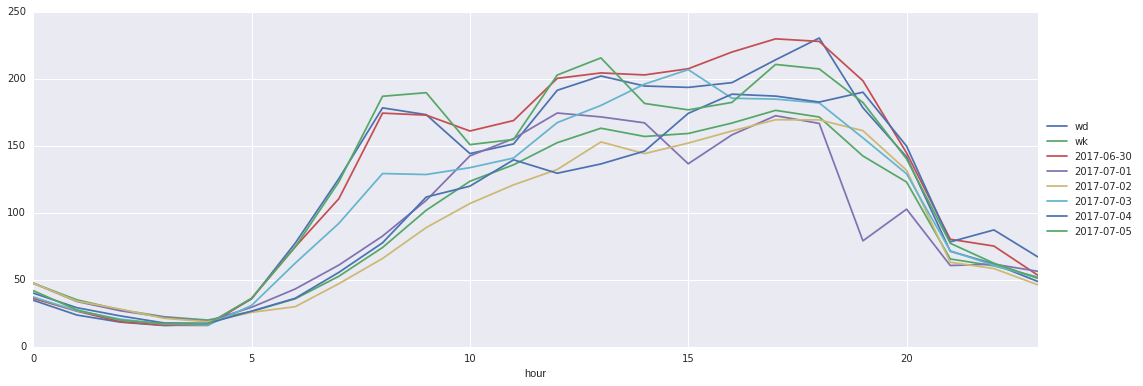

In [150]:
ax = df_hr[df_hr.columns[[0,1,4,5,6,7,8,9]]]\
            .plot(figsize = (18,6))\
            .legend(loc='center left', bbox_to_anchor=(1, 0.5))

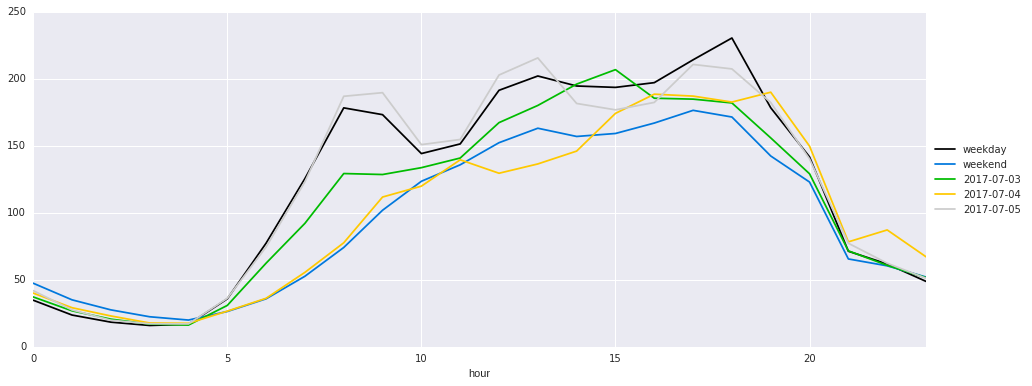

In [160]:
ax = df_hr[df_hr.columns[[0,1,7,8,9]]]\
            .plot(figsize = (16,6),colormap='nipy_spectral')\
            .legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [237]:
wd = []
for i in range(24):
    wd.append(df[(df.dow < 5) & (df.hour == i)].std()['count']\
              /np.sqrt(len(df[(df.dow > 4) & (df.hour == i)])))

wk = []
for i in range(24):
    wk.append(df[(df.dow > 4) & (df.hour == i)].std()['count']\
              /np.sqrt(len(df[(df.dow > 4) & (df.hour == i)])))

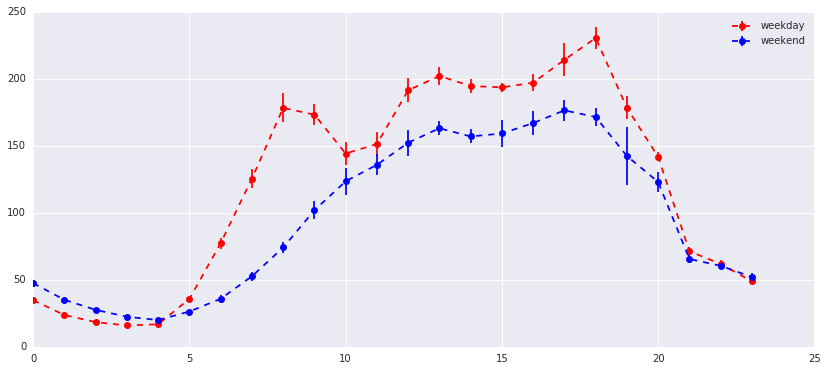

In [213]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(111)

ax.errorbar(df_hr.index, df_hr.weekday, yerr=wd,fmt='ro--')
ax.errorbar(df_hr.index, df_hr.weekend, yerr=wk,fmt='bo--')
ax.legend(loc='upper right', numpoints=1)
plt.show()

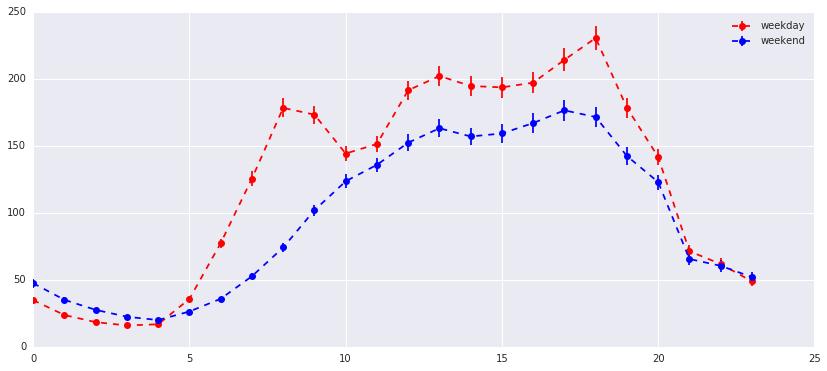

In [238]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(111)

ax.errorbar(df_hr.index, df_hr.weekday, yerr=wd,fmt='ro--')
ax.errorbar(df_hr.index, df_hr.weekend, yerr=wk,fmt='bo--')
ax.legend(loc='upper right', numpoints=1)
plt.show()